# Preparing Dataset

## Mengunduh Dataset

In [1]:
!gdown --id 13-14hjG-XmYMzFy8SzHX9WoWBVihKqM3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13-14hjG-XmYMzFy8SzHX9WoWBVihKqM3
From (redirected): https://drive.google.com/uc?id=13-14hjG-XmYMzFy8SzHX9WoWBVihKqM3&confirm=t&uuid=4f741172-82bb-4241-b891-7cddf4617b62
To: /content/Hardware.zip
100% 163M/163M [00:03<00:00, 49.2MB/s]


In [2]:
!unzip Hardware.zip

Archive:  Hardware.zip
   creating: Hardware/
   creating: Hardware/cables/
  inflating: Hardware/cables/100_19f20ae308e641f2888e653963a78da7.jpg  
  inflating: Hardware/cables/101_5245d33029cf4f8384aff616f8d711cc.jpg  
  inflating: Hardware/cables/102_2b7e2861fbbc466ba691fe818874aedb.jpg  
  inflating: Hardware/cables/103_fe796558c11548d9b71196848baf5486.jpg  
  inflating: Hardware/cables/104_5bf478bef751483684c19fc15b09d557.jpg  
  inflating: Hardware/cables/105_d5b1666bf7dc48628eb69c53826d8706.jpg  
  inflating: Hardware/cables/106_6e4af2db7dbd44398abf836f4d35df60.jpg  
  inflating: Hardware/cables/107_d19279405a7148f5aa44021546a32cfb.jpg  
  inflating: Hardware/cables/108_1a4e925df95b461ab254873981d90abe.jpg  
  inflating: Hardware/cables/109_874fab1f020a46959e542a89b47365fd.jpg  
  inflating: Hardware/cables/10_a555c274bad348cdb4cecf49427ce8d7.jpg  
  inflating: Hardware/cables/110_1b5cf4c9c6d140d3a8b61615b76f587b.jpg  
  inflating: Hardware/cables/111_50a9f5316b8541349dac6262f2e7

## Library

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
import os
import seaborn as sns
import random
import shutil
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
from collections import defaultdict
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

## EDA

In [4]:
# Path Folder Dataset
hardware_folder_path = 'Hardware'

In [5]:
# Get class names and image counts
class_names = os.listdir(hardware_folder_path)
image_counts = [len(os.listdir(os.path.join(hardware_folder_path, cls))) for cls in class_names]

In [6]:
# Create a Pandas Series for class distribution
class_distribution = pd.Series(image_counts, index=class_names)

### Distribusi Citra per Kelas


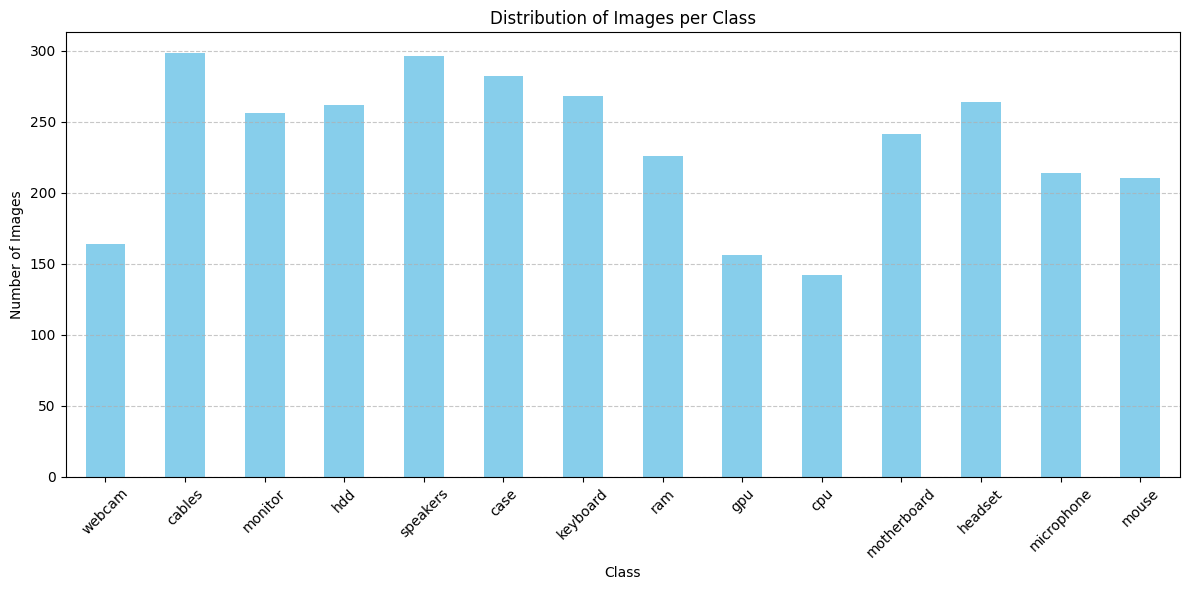

In [7]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Ukuran rata-rata dan dimensi citra

In [8]:
from PIL import Image
import os
import pandas as pd

# Collect image size data
image_data = []
for root, _, files in os.walk(hardware_folder_path):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                image_data.append({
                    "Width": img.width,
                    "Height": img.height,
                    "Size (KB)": os.path.getsize(file_path) / 1024
                })

# Create a DataFrame
image_df = pd.DataFrame(image_data)

# Calculate average dimensions and file size
avg_width = image_df['Width'].mean()
avg_height = image_df['Height'].mean()
avg_size_kb = image_df['Size (KB)'].mean()

# Display results
print(f"Average Width: {avg_width:.2f} pixels")
print(f"Average Height: {avg_height:.2f} pixels")
print(f"Average File Size: {avg_size_kb:.2f} KB")

# Display summary statistics for dimensions
print("\nSummary Statistics:")
print(image_df.describe())


Average Width: 512.00 pixels
Average Height: 512.00 pixels
Average File Size: 49.56 KB

Summary Statistics:
        Width  Height    Size (KB)
count  3279.0  3279.0  3279.000000
mean    512.0   512.0    49.558764
std       0.0     0.0    18.777547
min     512.0   512.0     9.774414
25%     512.0   512.0    35.095215
50%     512.0   512.0    48.054688
75%     512.0   512.0    61.965332
max     512.0   512.0   124.890625


### Contoh Citra


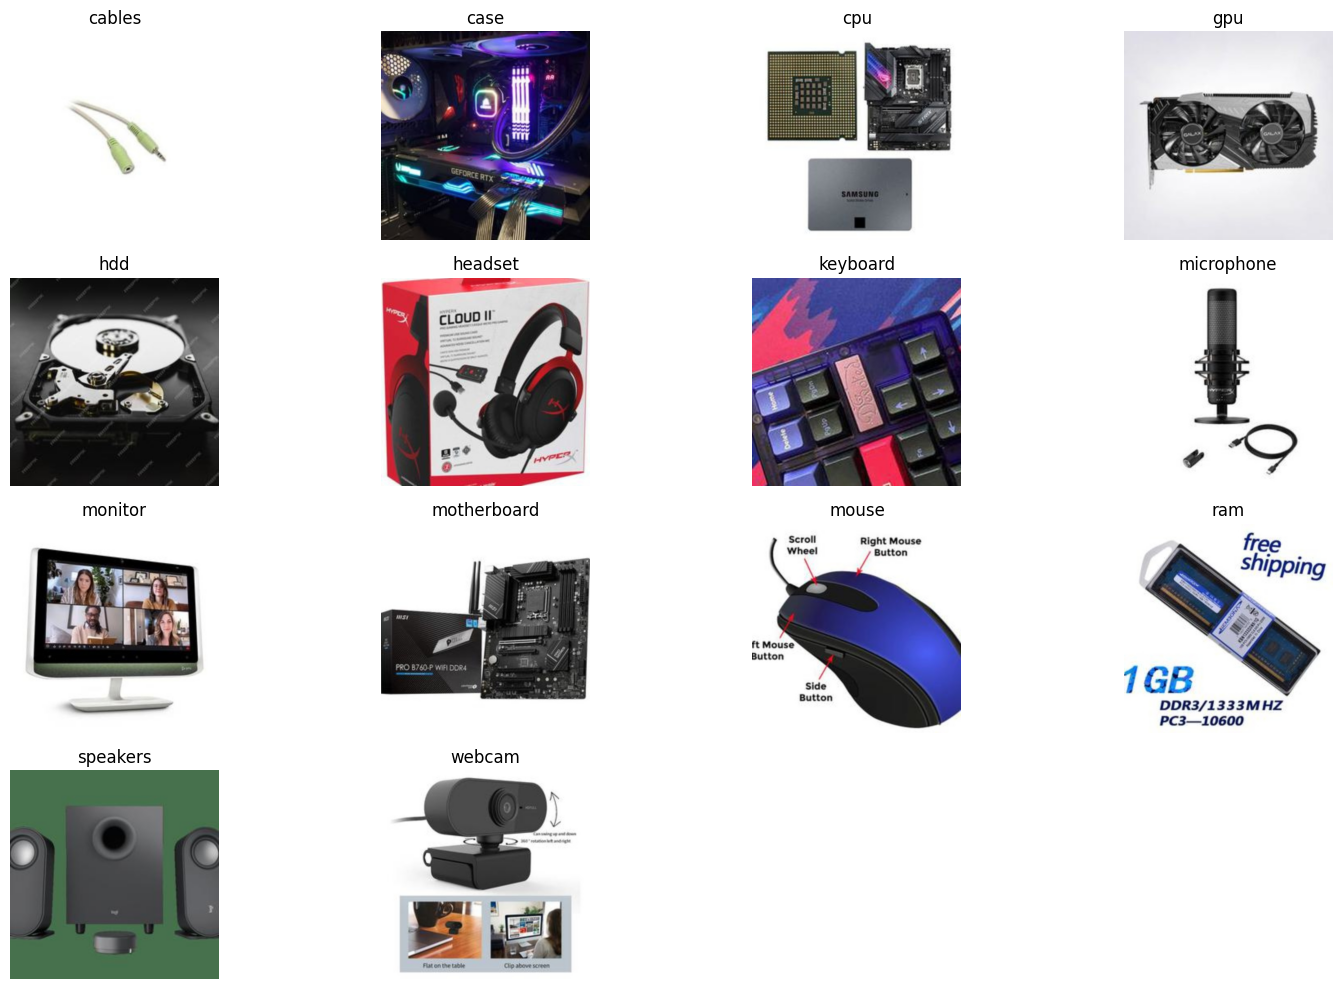

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Get class names
classes = sorted(os.listdir(hardware_folder_path))

# Plot one image from each class
plt.figure(figsize=(15, 10))

for idx, cls in enumerate(classes):
    class_folder = os.path.join(hardware_folder_path, cls)
    if os.path.isdir(class_folder):
        # Get the first image in the class folder
        first_image = os.listdir(class_folder)[0]
        img_path = os.path.join(class_folder, first_image)

        # Load and plot the image
        with Image.open(img_path) as img:
            plt.subplot(4, 4, idx + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')

plt.tight_layout()
plt.show()


### Jumlah citra per kelas


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Count images in each class
class_counts = {}
for cls in os.listdir(hardware_folder_path):
    class_folder = os.path.join(hardware_folder_path, cls)
    if os.path.isdir(class_folder):
        class_counts[cls] = len([file for file in os.listdir(class_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))])

# Convert to DataFrame for better display
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count']).sort_values(by='Image Count', ascending=False)

# Display class counts
print("Number of images per class:")
print(class_counts_df)

Number of images per class:
          Class  Image Count
1        cables          298
4      speakers          296
5          case          282
6      keyboard          268
11      headset          264
3           hdd          262
2       monitor          256
10  motherboard          241
7           ram          226
12   microphone          214
13        mouse          210
0        webcam          164
8           gpu          156
9           cpu          142


## Augmentasi

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import glob
import os
import shutil

# Path Folder Dataset
hardware_folder_path = 'Hardware/'  # Folder asli
target_per_class = 800  # Target per kelas

# Augmented Folder
augmented_data_path = 'Augmented_Hardware/'
os.makedirs(augmented_data_path, exist_ok=True)

# Get class names and file paths
class_names = [f for f in os.listdir(hardware_folder_path) if os.path.isdir(os.path.join(hardware_folder_path, f))]
class_file_paths = {cls: glob.glob(os.path.join(hardware_folder_path, cls, '*')) for cls in class_names}

# Count current images and calculate additional needed per class
additional_images_needed = {cls: max(0, target_per_class - len(files)) for cls, files in class_file_paths.items()}

# Augmentation configuration
augment_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Augmentation process
for cls, additional_needed in additional_images_needed.items():
    cls_path = os.path.join(hardware_folder_path, cls)
    aug_cls_path = os.path.join(augmented_data_path, cls)
    os.makedirs(aug_cls_path, exist_ok=True)

    # Copy existing images to augmented folder without changing file names
    for img_path in glob.glob(os.path.join(cls_path, '*')):
        img_name = os.path.basename(img_path)
        target_path = os.path.join(aug_cls_path, img_name)
        if not os.path.exists(target_path):
            shutil.copy(img_path, target_path)

    # Perform augmentation if additional images are needed
    if additional_needed > 0:
        cls_images = glob.glob(os.path.join(cls_path, "*"))
        count = 0
        for img_path in cls_images:
            if count >= additional_needed:
                break
            try:
                img = load_img(img_path)
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)

                # Generate augmented images
                for batch in augment_datagen.flow(
                    img_array,
                    batch_size=1,
                    save_to_dir=aug_cls_path,
                    save_prefix='aug',
                    save_format='jpg'
                ):
                    count += 1
                    if count >= additional_needed:
                        break
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

# Verify augmentation results
augmented_counts = {cls: len(os.listdir(os.path.join(augmented_data_path, cls))) for cls in class_names}
print("Augmentation completed. Images per class:", augmented_counts)

Augmentation completed. Images per class: {'webcam': 782, 'cables': 791, 'monitor': 785, 'hdd': 788, 'speakers': 784, 'case': 781, 'keyboard': 781, 'ram': 780, 'gpu': 785, 'cpu': 784, 'motherboard': 784, 'headset': 785, 'microphone': 780, 'mouse': 785}


### Jumlah citra setelah di augmentasi

In [12]:
import os

# Path to dataset
hardware_folder_path_augment = 'Augmented_Hardware'

# Count images in each class
class_counts = {}
for cls in os.listdir(hardware_folder_path_augment):
    class_folder = os.path.join(hardware_folder_path_augment, cls)
    if os.path.isdir(class_folder):
        class_counts[cls] = len([file for file in os.listdir(class_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))])

# Total number of images
total_images = sum(class_counts.values())
print(f"\nTotal images in dataset: {total_images}")



Total images in dataset: 10975


### Distribusi citra setelah di augmentasi

Number of images per class after augmentation:
          Class  Image Count
1        cables          791
3           hdd          788
2       monitor          785
8           gpu          785
11      headset          785
13        mouse          785
4      speakers          784
9           cpu          784
10  motherboard          784
0        webcam          782
5          case          781
6      keyboard          781
7           ram          780
12   microphone          780


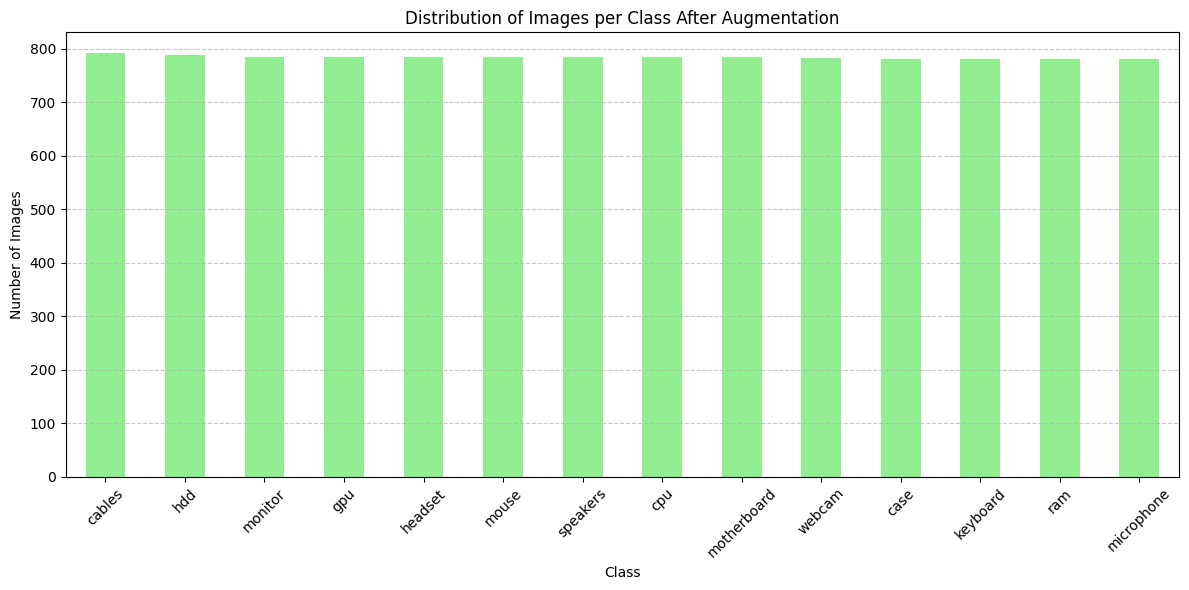

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to augmented dataset
#augmented_dataset_path = 'path/to/your/augmented/dataset'

# Count images in each class
augmented_class_counts = {}
for cls in os.listdir(hardware_folder_path_augment):
    class_folder = os.path.join(hardware_folder_path_augment, cls)
    if os.path.isdir(class_folder):
        augmented_class_counts[cls] = len([file for file in os.listdir(class_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))])

# Convert to DataFrame for visualization
augmented_class_counts_df = pd.DataFrame(list(augmented_class_counts.items()), columns=['Class', 'Image Count']).sort_values(by='Image Count', ascending=False)

# Display augmented class counts
print("Number of images per class after augmentation:")
print(augmented_class_counts_df)

# Plot augmented class distribution
plt.figure(figsize=(12, 6))
augmented_class_counts_df.set_index('Class')['Image Count'].plot(kind='bar', color='lightgreen')
plt.title('Distribution of Images per Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Splitting Data Citra

In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_dataset_path = 'Augmented_Hardware/'
split_base_path = 'Split_Dataset/'
os.makedirs(split_base_path, exist_ok=True)

train_path = os.path.join(split_base_path, 'train')
val_path = os.path.join(split_base_path, 'val')
test_path = os.path.join(split_base_path, 'test')

# Function to create directories
def create_directories(base_path, class_names):
    for cls in class_names:
        os.makedirs(os.path.join(base_path, cls), exist_ok=True)

# Get class names and file paths
class_names = [f for f in os.listdir(original_dataset_path) if os.path.isdir(os.path.join(original_dataset_path, f))]
class_file_paths = {
    cls: [os.path.join(original_dataset_path, cls, file)
          for file in os.listdir(os.path.join(original_dataset_path, cls))
          if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    for cls in class_names
}

# Create directories for splits
create_directories(train_path, class_names)
create_directories(val_path, class_names)
create_directories(test_path, class_names)

# Split files into train, validation, and test (70-20-10)
for cls, files in class_file_paths.items():
    train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=1/3, random_state=42)

    # Copy files to respective directories
    for file in train_files:
        shutil.copy(file, os.path.join(train_path, cls))
    for file in val_files:
        shutil.copy(file, os.path.join(val_path, cls))
    for file in test_files:
        shutil.copy(file, os.path.join(test_path, cls))

print("Dataset successfully split into train (70%), validation (20%), and test (10%) sets!")

Dataset successfully split into train (70%), validation (20%), and test (10%) sets!


## Prepare data for model

In [15]:
# Parameter
img_height, img_width = 125, 125
batch_size = 32
epochs = 50

# Image data generator
train_datagen = ImageDataGenerator(rescale=1./256)
val_datagen = ImageDataGenerator(rescale=1./256)
test_datagen = ImageDataGenerator(rescale=1./256)

### Inisialisai object diirectory


In [16]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),  # Match input shape of your model
    batch_size=batch_size,  # Adjust batch size as needed
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7675 images belonging to 14 classes.
Found 2195 images belonging to 14 classes.
Found 1105 images belonging to 14 classes.


### Amount of Data after split


In [17]:
# prompt: menampilkan jumlah data train, val, dan tes

import os

split_base_path = 'Split_Dataset/'
train_path = os.path.join(split_base_path, 'train')
val_path = os.path.join(split_base_path, 'val')
test_path = os.path.join(split_base_path, 'test')

# Function to count files in a directory
def count_files(directory):
  return sum([len(files) for r, d, files in os.walk(directory)])

train_count = count_files(train_path)
val_count = count_files(val_path)
test_count = count_files(test_path)

print(f"Jumlah data train: {train_count}")
print(f"Jumlah data val: {val_count}")
print(f"Jumlah data tes: {test_count}")

Jumlah data train: 7675
Jumlah data val: 2195
Jumlah data tes: 1105


# Creating a Model CNN

In [19]:
num_classes = 14
input_shape = (125, 125, 3)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the feature maps
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization

    # Fully Connected Layer 2 (Output Layer)
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

    return model

# Create the model
cnn_model = create_cnn_model(input_shape, num_classes)

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 123, 123, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,864,078 (10.93 MB)

 Trainable params: 2,864,078 (10.93 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [22]:
history = cnn_model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/241 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.5061 - loss: 1.7361 - val_accuracy: 0.7523 - val_loss: 0.8361
Epoch 2/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.7670 - loss: 0.8206 - val_accuracy: 0.7719 - val_loss: 0.7529
Epoch 3/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.7906 - loss: 0.6954 - val_accuracy: 0.7796 - val_loss: 0.7127
Epoch 4/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8118 - loss: 0.5782 - val_accuracy: 0.7773 - val_loss: 0.7301
Epoch 5/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8311 - loss: 0.5462 - val_accuracy: 0.7878 - val_loss: 0.7119
Epoch 6/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.8539 - loss: 0.4545 - val_accuracy: 0.7905 - val_loss: 0.7201
Epoch 7/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8654 - loss: 0.4076 - val_accuracy: 0.7910 - val_loss: 0.7408
Epoch 8/25
241/241 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.8748 - loss: 0.3710 - val_accura

## Save Model CNN

In [ ]:
from google.colab import files
cnn_model.save('cnn_model.h5')
files.download('cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot Accuracy and Loss

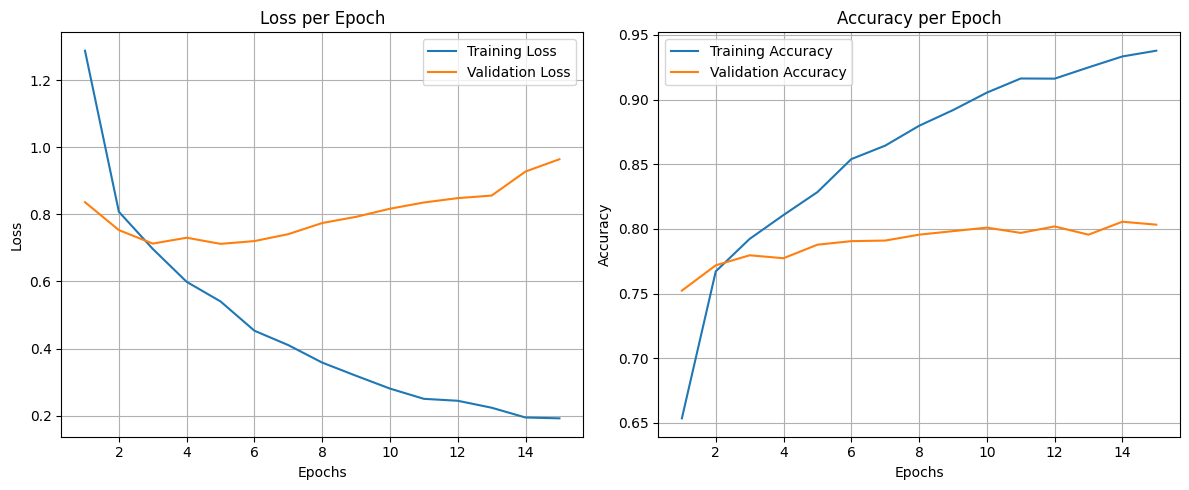

In [23]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Classification Report CNN on Validation Data

In [25]:
# Predict on validation data
y_pred = cnn_model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step
              precision    recall  f1-score   support

      cables       0.63      0.76      0.69       158
        case       0.76      0.79      0.77       157
         cpu       0.93      0.84      0.88       156
         gpu       0.82      0.87      0.84       156
         hdd       0.76      0.81      0.78       157
     headset       0.85      0.82      0.84       158
    keyboard       0.72      0.71      0.72       157
  microphone       0.91      0.79      0.85       156
     monitor       0.88      0.81      0.84       156
 motherboard       0.64      0.85      0.73       157
       mouse       0.79      0.86      0.82       157
         ram       0.89      0.74      0.81       157
    speakers       0.89      0.73      0.81       158
      webcam       0.96      0.87      0.91       156

    accuracy                           0.80      2196
   macro avg       0.82      0.80      0.81      2196
weighted avg       0.82      0.80      0

## Confussion Matrix

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


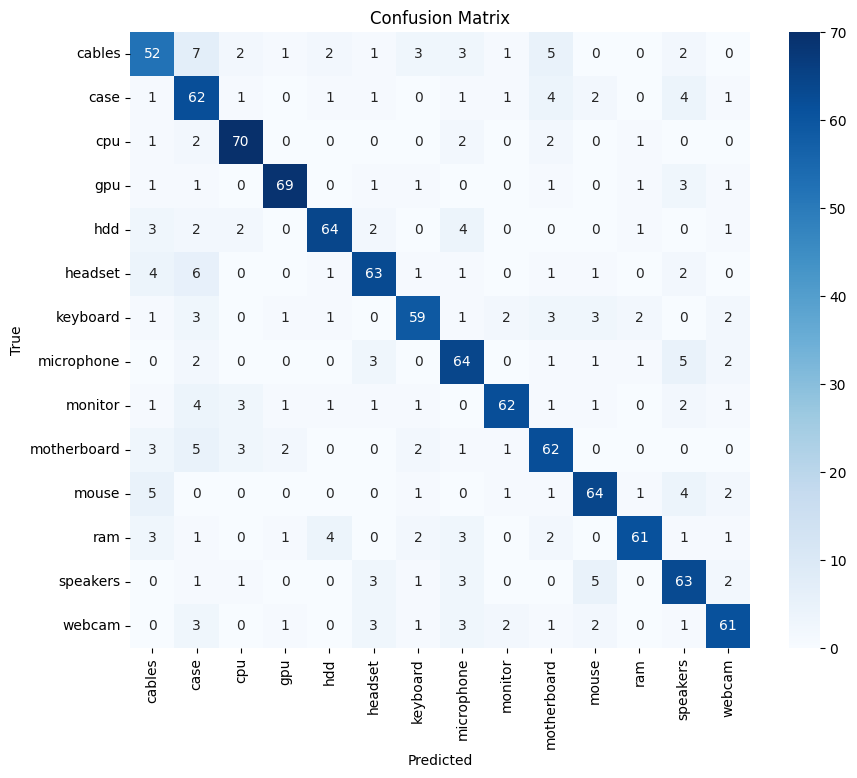

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Evaluating Model on Data test

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.0557
Test Accuracy: 0.7920


## Classification Report on Test Data

In [26]:
# Predict on test data
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

 3/35 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
              precision    recall  f1-score   support

      cables       0.67      0.76      0.71        79
        case       0.72      0.85      0.78        79
         cpu       0.90      0.78      0.84        79
         gpu       0.77      0.81      0.79        78
         hdd       0.75      0.75      0.75        79
     headset       0.82      0.74      0.78        80
    keyboard       0.78      0.81      0.80        79
  microphone       0.79      0.80      0.79        79
     monitor       0.89      0.78      0.83        79
 motherboard       0.68      0.90      0.78        79
       mouse       0.76      0.80      0.78        79
         ram       0.90      0.77      0.83        79
    speakers       0.85      0.76      0.80        79
      webcam       0.97      0.78      0.87        79

    accuracy                           0.79      1106
   macro avg       0.80      0.79      0.79      1106
weighted avg       0.80      0.79      

# Pre-Trained MobileNet


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
# Load MobileNet with pretrained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(125, 125, 3))

<ipython-input-19-b33dd1af9f0f>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(125, 125, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
# Freeze the base model layers to retain pretrained weights
base_model.trainable = False

In [21]:
num_classes = 14

In [22]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [23]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 125, 125, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 63, 63, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 63, 63, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 63, 63, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 63, 63, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 63, 63, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 63, 63, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 31, 31, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 31, 31, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 31, 31, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 31, 31, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 31, 31, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 31, 31, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 31, 31, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,361,870 (12.82 MB)

 Trainable params: 133,006 (519.55 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [26]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


240/240 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.6939 - loss: 1.2321 - val_accuracy: 0.8779 - val_loss: 0.4227
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.8692 - loss: 0.4360 - val_accuracy: 0.8884 - val_loss: 0.3863
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9012 - loss: 0.3420 - val_accuracy: 0.8961 - val_loss: 0.3753
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9081 - loss: 0.3064 - val_accuracy: 0.9011 - val_loss: 0.3506
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9268 - loss: 0.2476 - val_accuracy: 0.8979 - val_loss: 0.3648
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.9227 - loss: 0.2528 - val_accuracy: 0.9030 - val_loss: 0.3690
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.9347 - loss: 0.2009 - val_accuracy: 0.8970 - val_loss: 0.3791
Epoch 8/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9447 - loss: 0.1783 - val_accura

In [ ]:
from google.colab import files
model.save('model.h5')
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

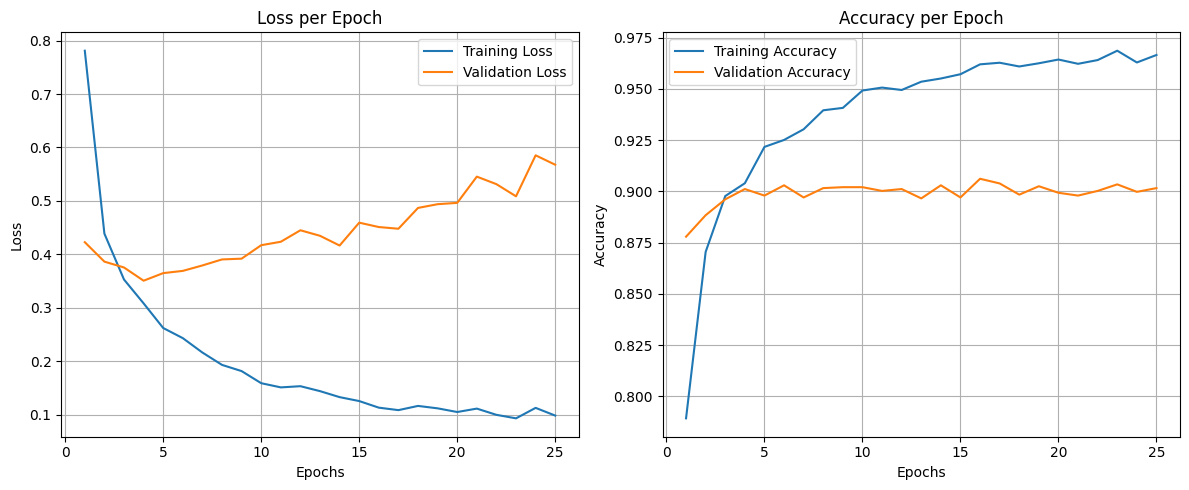

In [27]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
# Predict on validation data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step
              precision    recall  f1-score   support

      cables       0.80      0.81      0.81       158
        case       0.82      0.89      0.86       156
         cpu       0.94      0.88      0.91       157
         gpu       0.91      0.94      0.93       157
         hdd       0.90      0.91      0.90       158
     headset       0.92      0.92      0.92       157
    keyboard       0.88      0.88      0.88       156
  microphone       0.90      0.92      0.91       156
     monitor       0.93      0.91      0.92       157
 motherboard       0.86      0.87      0.86       157
       mouse       0.93      0.94      0.93       157
         ram       0.93      0.88      0.91       156
    speakers       0.95      0.93      0.94       157
      webcam       0.97      0.94      0.95       156

    accuracy                           0.90      2195
   macro avg       0.90      0.90      0.90      2195
weighted avg       0.90      0.90      0

 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step


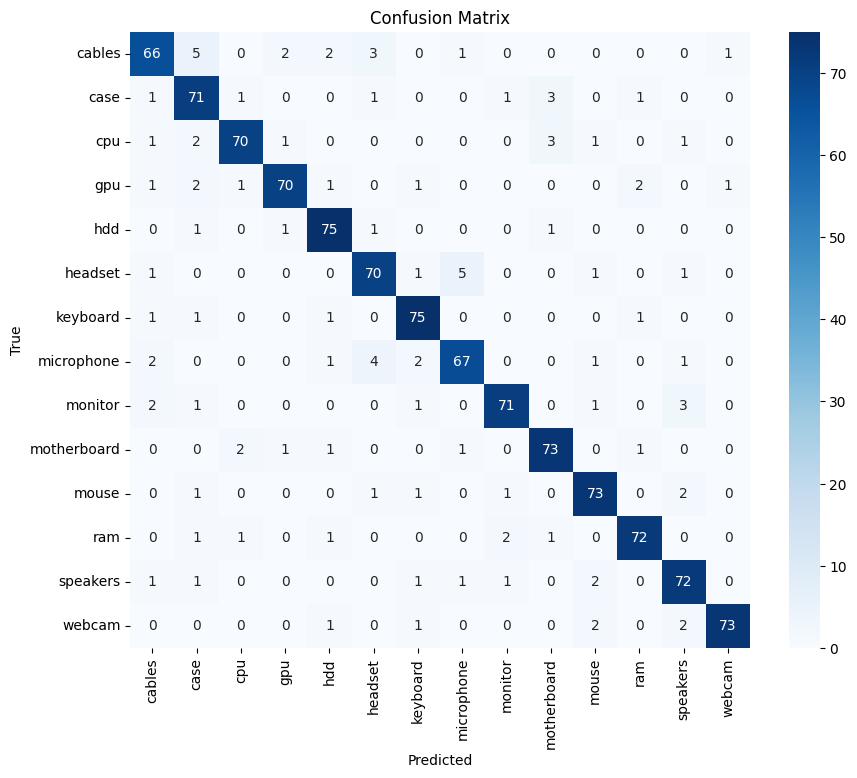

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5952
Test Accuracy: 0.9032


In [31]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step
              precision    recall  f1-score   support

      cables       0.87      0.82      0.85        80
        case       0.83      0.90      0.86        79
         cpu       0.93      0.89      0.91        79
         gpu       0.93      0.89      0.91        79
         hdd       0.90      0.95      0.93        79
     headset       0.88      0.89      0.88        79
    keyboard       0.90      0.95      0.93        79
  microphone       0.89      0.86      0.88        78
     monitor       0.93      0.90      0.92        79
 motherboard       0.90      0.92      0.91        79
       mouse       0.90      0.92      0.91        79
         ram       0.94      0.92      0.93        78
    speakers       0.88      0.91      0.89        79
      webcam       0.97      0.92      0.95        79

    accuracy                           0.90      1105
   macro avg       0.90      0.90      0.90      1105
weighted avg       0.90      0.90      0